<a href="https://colab.research.google.com/github/fathimajafir/Hotel-booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##Questions to be asked 
###1.What type of hotel does a customer prefer to book?
###2.Which type of hotel are cancelled mostly?
###3.Which month in an year gets maximum bookings?
###4.which packages are mostly opted by customers,complementary breakfast only,half boarding, full boarding?
###5.Which type of hotel gets repeated customers ?


##Data Cleaning

###Importing the libraries used for this project

In [19]:
import numpy as np
import pandas as pd


###Import data set and read as Panda data frame 

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df=pd.read_csv('/content/drive/MyDrive/capstone project/hotel booking csv/Hotel Bookings.csv')

###Display the first two rows

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


###Find the number of rows and columns in the data frame

In [23]:
df.shape

(119390, 32)

In [24]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##Find columns with null values 

In [26]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [27]:
#remove the columns agent and company
df=df.drop(['agent','company'],axis=1)

###The columns children and country have minimum number of null values.So we can drop the rows with null values 

In [28]:
df=df.dropna(axis=0)

In [29]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

###Now all null values are removed

In [31]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000
mean,0.275939,80.202741,2016.211842,26.841694,15.818453,1.007548,2.628955,1.878604,0.139253,0.010815,0.039246,0.030237,0.176761,0.271912,0.753722,106.580816,0.083473,0.699542
std,0.446989,86.102902,0.685989,13.654113,8.834539,1.028821,2.043860,0.625881,0.456848,0.113510,0.194180,0.369629,1.718139,0.728177,10.043309,54.959600,0.280440,0.831880
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [32]:
#To find outliers we can draw some boxplots 

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


###Columns to keep

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


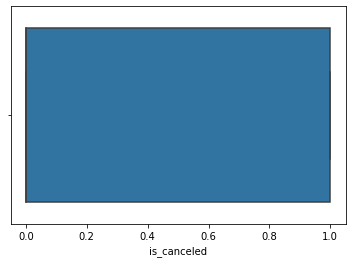

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['is_canceled'])





  
  
  





In [36]:
#remove outliers for the column is_canceled
Q1 = df['is_canceled'].quantile(0.25)
Q3 = df['is_canceled'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['is_canceled'] >= Q1 - 1.5 * IQR) & (df['is_canceled'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


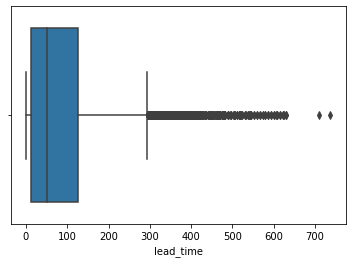

In [37]:
sns.boxplot(df['lead_time'])

In [ ]:
# Removing Outliers from the column lead_time 

In [38]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['lead_time'] >= Q1 - 1.5 * IQR) & (df['lead_time'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


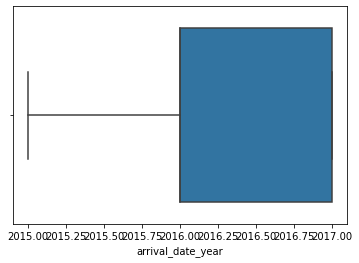

In [39]:
#boxplot for the column arrival_date_year
sns.boxplot(df['arrival_date_year'])

In [40]:
#remove outliers from the column arrival_date_year
Q1 = df['arrival_date_year'].quantile(0.25)
Q3 = df['arrival_date_year'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['arrival_date_year'] >= Q1 - 1.5 * IQR) & (df['arrival_date_year'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


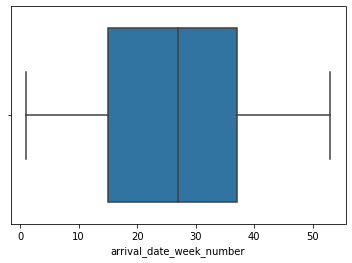

In [41]:
#boxplot for the column arrival_date_week_number
sns.boxplot(df['arrival_date_week_number'])

In [42]:
#remove outliers from arrival_date_week_number
Q1 = df['arrival_date_week_number'].quantile(0.25)
Q3 = df['arrival_date_week_number'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['arrival_date_week_number'] >= Q1 - 1.5 * IQR) & (df['arrival_date_week_number'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


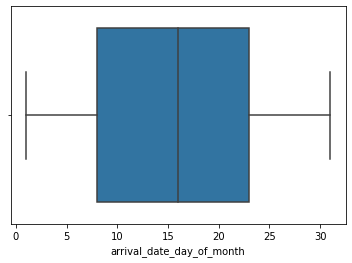

In [43]:
#boxplot for the column arrival_date_day_of_month
sns.boxplot(df['arrival_date_day_of_month'])

In [44]:
#remove outliers from the column arrival_date_day_of_month
Q1 = df['arrival_date_day_of_month'].quantile(0.25)
Q3 = df['arrival_date_day_of_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['arrival_date_day_of_month'] >= Q1 - 1.5 * IQR) & (df['arrival_date_day_of_month'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


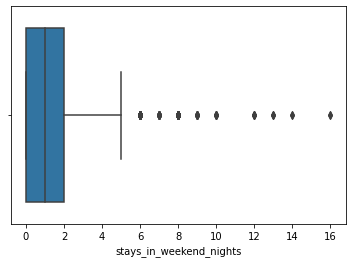

In [45]:
#boxplot for the column stays_in_weekend_nights
sns.boxplot(df['stays_in_weekend_nights'])

In [46]:
#remove outliers from the column stays_in_weekend_nights
Q1 = df['stays_in_weekend_nights'].quantile(0.25)
Q3 = df['stays_in_weekend_nights'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['stays_in_weekend_nights'] >= Q1 - 1.5 * IQR) & (df['stays_in_weekend_nights'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


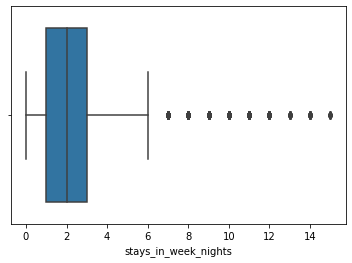

In [47]:
#boxplot for the columnstays_in_week_nights
sns.boxplot(df['stays_in_week_nights'])

In [48]:
#remove the outliers from the column stays_in_week_nights
Q1 = df['stays_in_week_nights'].quantile(0.25)
Q3 = df['stays_in_week_nights'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['stays_in_week_nights'] >= Q1 - 1.5 * IQR) & (df['stays_in_week_nights'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


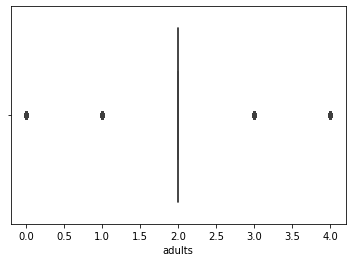

In [49]:
#boxplot for the column adults 
sns.boxplot(df['adults'])

In [50]:
#remove the outliers from the column adults
Q1 = df['adults'].quantile(0.25)
Q3 = df['adults'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['adults'] >= Q1 - 1.5 * IQR) & (df['adults'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


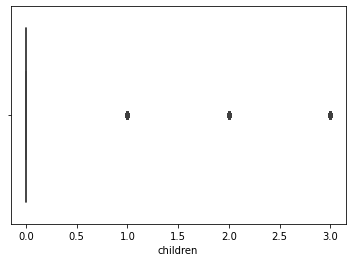

In [51]:
#boxplot for the column children 
sns.boxplot(df['children'])

In [52]:
#remove outliers from the column children 
Q1 = df['children'].quantile(0.25)
Q3 = df['children'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['children'] >= Q1 - 1.5 * IQR) & (df['children'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


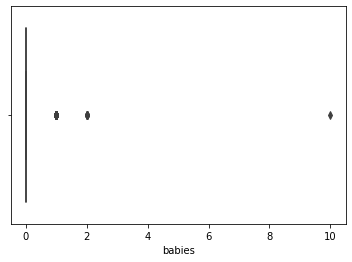

In [53]:
#boxplot for the column babies 
sns.boxplot(df['babies'])

In [54]:
#remove outliers from the column babies  
Q1 = df['babies'].quantile(0.25)
Q3 = df['babies'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['babies'] >= Q1 - 1.5 * IQR) & (df['babies'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


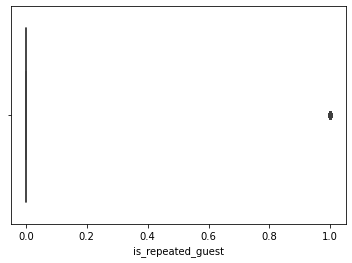

In [55]:
#boxplot for the column is_repeated_guest 
sns.boxplot(df['is_repeated_guest'])

In [56]:
#remove outliers from the column is_repeated_guest
Q1 = df['is_repeated_guest'].quantile(0.25)
Q3 = df['is_repeated_guest'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['is_repeated_guest'] >= Q1 - 1.5 * IQR) & (df['is_repeated_guest'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 


In [ ]:
#boxplot for the column previous_cancellations
sns.boxplot(df['previous_cancellations'])

In [58]:
#remove outliers from previous_cancellations
Q1 = df['previous_cancellations'].quantile(0.25)
Q3 = df['previous_cancellations'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['previous_cancellations'] >= Q1 - 1.5 * IQR) & (df['previous_cancellations'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


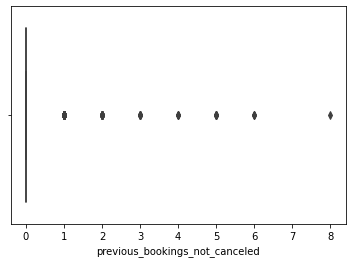

In [59]:
#boxplot for the column previous_bookings_not_canceled	
sns.boxplot(df['previous_bookings_not_canceled'])

In [60]:
#remove outliers from the column previous_bookings_not_canceled	
Q1 = df['previous_bookings_not_canceled'].quantile(0.25)
Q3 = df['previous_bookings_not_canceled'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['previous_bookings_not_canceled'] >= Q1 - 1.5 * IQR) & (df['previous_bookings_not_canceled'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


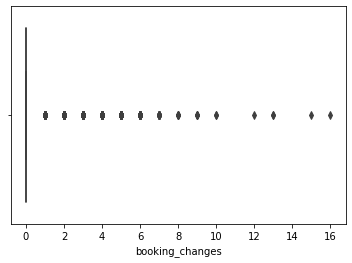

In [61]:
#boxplot for the column booking_changes
sns.boxplot(df['booking_changes'])

In [62]:
#remove outliers from the column booking_changes
Q1 = df['booking_changes'].quantile(0.25)
Q3 = df['booking_changes'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['booking_changes'] >= Q1 - 1.5 * IQR) & (df['booking_changes'] <= Q3 + 1.5 *IQR)
df=df.loc[filter] 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


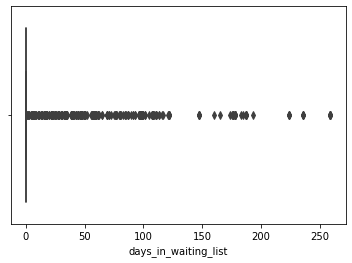

In [63]:
#boxplot for the column days_in_waiting_list
sns.boxplot(df['days_in_waiting_list'])

In [64]:
#remove outliers from the column days_in_waiting_list
Q1 = df['days_in_waiting_list'].quantile(0.25)
Q3 = df['days_in_waiting_list'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['days_in_waiting_list'] >= Q1 - 1.5 * IQR) & (df['days_in_waiting_list'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


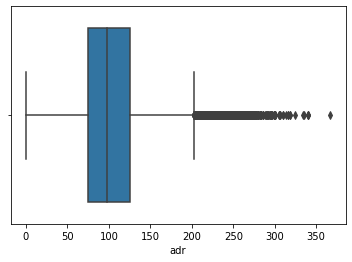

In [65]:
#boxplot for the column adr
sns.boxplot(df['adr'])

In [66]:
#remove outliers from the column adr
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['adr'] >= Q1 - 1.5 * IQR) & (df['adr'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


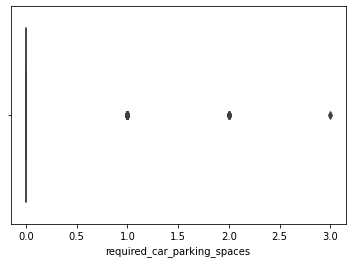

In [67]:
#boxplot for the column required_car_parking_spaces
sns.boxplot(df['required_car_parking_spaces'])

In [68]:
#remove outliers from the column required_car_parking_spaces
Q1 = df['required_car_parking_spaces'].quantile(0.25)
Q3 = df['required_car_parking_spaces'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['required_car_parking_spaces'] >= Q1 - 1.5 * IQR) & (df['required_car_parking_spaces'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


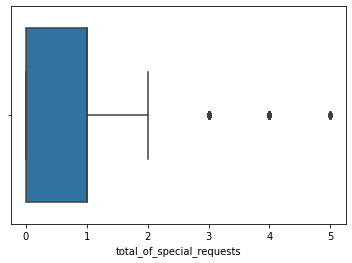

In [69]:
#boxplot for the column total_of_special_requests
sns.boxplot(df['total_of_special_requests'])

In [70]:
#remove outliers from the column total_of_special_requests
Q1 = df['total_of_special_requests'].quantile(0.25)
Q3 = df['total_of_special_requests'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['total_of_special_requests'] >= Q1 - 1.5 * IQR) & (df['total_of_special_requests'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]


In [71]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,38325.000000,38325.000000,38325.000000,38325.000000,38325.000000,38325.000000,38325.000000,38325.0,38325.0,38325.0,38325.0,38325.0,38325.0,38325.0,38325.0,38325.000000,38325.0,38325.000000
mean,0.310815,75.978421,2016.215708,26.401487,15.747867,0.982179,2.485740,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.895703,0.0,0.646341
std,0.462833,70.937481,0.681049,13.576292,8.861540,0.884536,1.489775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.656708,0.0,0.705195
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
25%,0.000000,17.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,0.0,0.000000
50%,0.000000,54.000000,2016.000000,26.000000,16.000000,1.000000,2.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.400000,0.0,1.000000
75%,1.000000,119.000000,2017.000000,37.000000,24.000000,2.000000,3.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.860000,0.0,1.000000
max,1.000000,294.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.500000,0.0,2.000000


###Merge 'babies' and 'children' columns to column 'kids'

In [72]:
df1=df.copy()

In [74]:
df1['kids']=df1['babies']+df1['children']

###convert datatypes to str

In [75]:
df1['arrival_date_day_of_month']=df1['arrival_date_day_of_month'].astype(str)
df1['arrival_date_month']=df1['arrival_date_month'].astype(str)
df1['arrival_date_year']=df1['arrival_date_year'].astype(str)